# Section 1: Querying a database in python

**1. Connect to your local postgres instance from python (use the pyscopg2 library).**

In [1]:
import psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

conn = psycopg2.connect(
    host="localhost",
    database="dvdrental",
    user="postgres",
    password="password"
)

**2. Write a query to return a dataset with film, rental, and payment information. Your dataset
should have multiple rows per film, one for each time the film was rented and the amount spent
on each rental. Create a dataframe with this information.**

In [2]:
query = '''
    SELECT
        f.film_id,
        f.title,
        r.rental_id,
        p.amount
    FROM
        film f
    JOIN
        inventory inv ON f.film_id = inv.film_id
    JOIN
        rental r ON inv.inventory_id = r.inventory_id
    JOIN
        payment p ON r.rental_id = p.rental_id
'''

df = pd.read_sql_query(query, conn)

print(df.head())

   film_id            title  rental_id  amount
0      749      Rules Human       1520    7.99
1      552  Majestic Floats       1778    1.99
2      551      Maiden Home       1849    7.99
3      445      Hyde Doctor       2829    2.99
4      563   Massacre Usual       3130    7.99


**3. Create a dataframe from the customer table.**

In [3]:
query = "SELECT * FROM customer"
df_customer = pd.read_sql_query(query, conn)

print(df_customer.head())

   customer_id  store_id first_name last_name  \
0          524         1      Jared       Ely   
1            1         1       Mary     Smith   
2            2         1   Patricia   Johnson   
3            3         1      Linda  Williams   
4            4         2    Barbara     Jones   

                                 email  address_id  activebool create_date  \
0         jared.ely@sakilacustomer.org         530        True  2006-02-14   
1        mary.smith@sakilacustomer.org           5        True  2006-02-14   
2  patricia.johnson@sakilacustomer.org           6        True  2006-02-14   
3    linda.williams@sakilacustomer.org           7        True  2006-02-14   
4     barbara.jones@sakilacustomer.org           8        True  2006-02-14   

              last_update  active  
0 2013-05-26 14:49:45.738       1  
1 2013-05-26 14:49:45.738       1  
2 2013-05-26 14:49:45.738       1  
3 2013-05-26 14:49:45.738       1  
4 2013-05-26 14:49:45.738       1  


# Section 2: Manipulating dataframes

**1. Create a column for customer name that has the first name and last name in the same column.**

In [4]:
query = '''
    SELECT
        f.title,
        p.amount,
        c.first_name,
        c.last_name,
        c.active,
        c.store_id,
        c.email
    FROM film f
    JOIN inventory inv ON f.film_id = inv.film_id
    JOIN rental r ON inv.inventory_id = r.inventory_id
    JOIN payment p ON r.rental_id = p.rental_id
    JOIN customer c ON p.customer_id = c.customer_id
'''

df = pd.read_sql_query(query, conn)

df['customer_name'] = df['first_name'] + ' ' + df['last_name']

print(df)

                      title  amount first_name last_name  active  store_id  \
0               Rules Human    7.99      Peter    Menard       1         1   
1           Majestic Floats    1.99      Peter    Menard       1         1   
2               Maiden Home    7.99      Peter    Menard       1         1   
3               Hyde Doctor    2.99      Peter    Menard       1         1   
4            Massacre Usual    7.99      Peter    Menard       1         1   
...                     ...     ...        ...       ...     ...       ...   
14591          Driver Annie    2.99   Courtney       Day       1         1   
14592            Swarm Gold    0.99     Vickie    Brewer       1         2   
14593  Drifter Commandments    4.99     Mattie   Hoffman       1         2   
14594          Earth Vision    0.99      Hilda   Hopkins       1         1   
14595           Flying Hook    2.99  Gwendolyn       May       1         1   

                                   email   customer_name  
0   

**2. Remove any inactive customers from the dataframe
Hint: use the active field**

In [5]:
df = df[df['active'] == 1]

print(df)

                      title  amount first_name last_name  active  store_id  \
0               Rules Human    7.99      Peter    Menard       1         1   
1           Majestic Floats    1.99      Peter    Menard       1         1   
2               Maiden Home    7.99      Peter    Menard       1         1   
3               Hyde Doctor    2.99      Peter    Menard       1         1   
4            Massacre Usual    7.99      Peter    Menard       1         1   
...                     ...     ...        ...       ...     ...       ...   
14591          Driver Annie    2.99   Courtney       Day       1         1   
14592            Swarm Gold    0.99     Vickie    Brewer       1         2   
14593  Drifter Commandments    4.99     Mattie   Hoffman       1         2   
14594          Earth Vision    0.99      Hilda   Hopkins       1         1   
14595           Flying Hook    2.99  Gwendolyn       May       1         1   

                                   email   customer_name  
0   

**3. Change the email addresses to be ‘joe.person@wustl.edu’, but only when their store_id is an even number.**

Hint: use apply to run a function over the dataframe, don’t forget to select the correct axis.

In [6]:
def update_email(row):
    if row['store_id'] % 2 == 0:
        return 'joe.person@wustl.edu'
    return row['email']

df['email'] = df.apply(update_email, axis=1)

print(df)

                      title  amount first_name last_name  active  store_id  \
0               Rules Human    7.99      Peter    Menard       1         1   
1           Majestic Floats    1.99      Peter    Menard       1         1   
2               Maiden Home    7.99      Peter    Menard       1         1   
3               Hyde Doctor    2.99      Peter    Menard       1         1   
4            Massacre Usual    7.99      Peter    Menard       1         1   
...                     ...     ...        ...       ...     ...       ...   
14591          Driver Annie    2.99   Courtney       Day       1         1   
14592            Swarm Gold    0.99     Vickie    Brewer       1         2   
14593  Drifter Commandments    4.99     Mattie   Hoffman       1         2   
14594          Earth Vision    0.99      Hilda   Hopkins       1         1   
14595           Flying Hook    2.99  Gwendolyn       May       1         1   

                                  email   customer_name  
0    

# Section 3: Visualizations

**1. How much does each customer tend to spend in aggregate?**

Clarification: You want to first create total spend by customer, then you want to visualize that distribution, each customer being an observation. A box and whisker plot would be a good visualization.

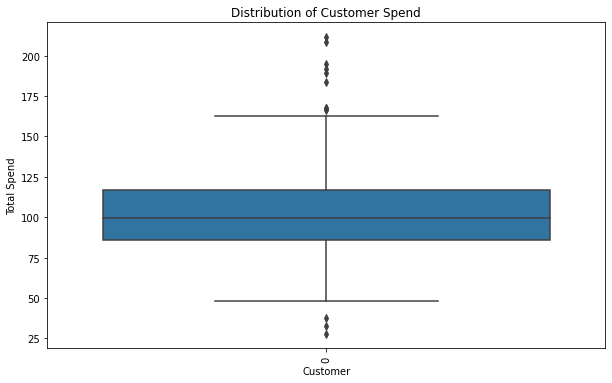

In [7]:
customer_spend = df.groupby('customer_name')['amount'].sum()

plt.figure(figsize = (10, 6))
sns.boxplot(data = customer_spend.values)
plt.xlabel('Customer')
plt.ylabel('Total Spend')
plt.title('Distribution of Customer Spend')
plt.xticks(rotation = 90)
plt.show()

**2. What does the distribution of film revenue look like?**

Clarification: You want to first calculate the revenue by film, you can sum the rental rate for each instance that the film was rented using the dataframe you created in section 1 part 2. A histogram would be a good visualization.

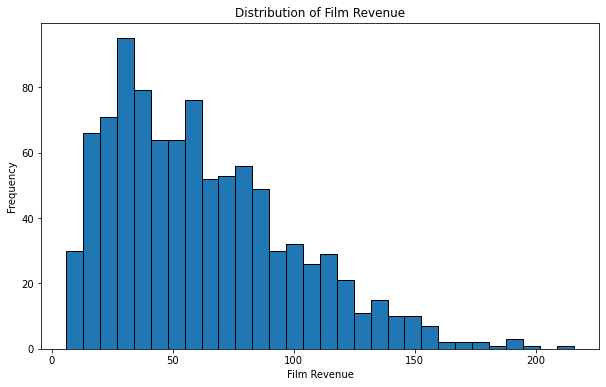

In [8]:
film_revenue = df.groupby('title')['amount'].sum()

plt.figure(figsize = (10, 6))
plt.hist(film_revenue.values, bins = 30, edgecolor = 'black')
plt.xlabel('Film Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Film Revenue')
plt.show()

# Section 4: Analysis

Clarification: Use the appropriate statistical test to answer the following questions. Please
annotate your code with which test you are using, the result of the test, and the interpretation.

**1. On average, is the rental rate the same across movie ratings, treat each film as an observation?**

In [9]:
query = '''
    SELECT
        f.film_id,
        f.title,
        f.rating,
        f.rental_rate,
        inv.store_id,
        f.description
    FROM film f
    JOIN inventory inv ON f.film_id = inv.film_id
    JOIN film_actor f_a ON f.film_id = f_a.film_id
'''

df = pd.read_sql_query(query, conn)

# one-way ANOVA test
result = stats.f_oneway(df[df['rating'] == 'G']['rental_rate'],
                        df[df['rating'] == 'PG']['rental_rate'],
                        df[df['rating'] == 'PG-13']['rental_rate'],
                        df[df['rating'] == 'R']['rental_rate'],
                        df[df['rating'] == 'NC-17']['rental_rate'])

print("ANOVA Test - Rental Rate across Movie Ratings:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("There is a significant difference in rental rates across movie ratings.")
else:
    print("There is no significant difference in rental rates across movie ratings.")

ANOVA Test - Rental Rate across Movie Ratings:
F-statistic: 15.196036667169755
p-value: 2.0541256769150715e-12
There is a significant difference in rental rates across movie ratings.


**2. Across the various film ratings, are we observing the same number of movies rented at store 2
and store 1?**

In [10]:
contingency_table = pd.crosstab(df['rating'], df['store_id'])

# Chi-square test of independence
result = stats.chi2_contingency(contingency_table)

print("Chi-square Test - Film Ratings vs. Rental Counts across Stores:")
print("Chi-square statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("There is a significant difference in the number of movies rented at stores 1 and 2 across film ratings.")
else:
    print("There is no significant difference in the number of movies rented at stores 1 and 2 across film ratings.")

Chi-square Test - Film Ratings vs. Rental Counts across Stores:
Chi-square statistic: 19.70668551112727
p-value: 0.0005705728881450246
There is a significant difference in the number of movies rented at stores 1 and 2 across film ratings.


**3. On average, do films with a character of a ‘robot’ generate the same amount of revenue (use
rental rate) as films that feature a ‘teacher’?**

Hint: sum the rental rate by film across rentals to get revenue by film.

In [11]:
robot_films = df[df['description'].str.contains('robot', case = False)]['rental_rate']
teacher_films = df[df['description'].str.contains('teacher', case = False)]['rental_rate']

# two-sample t-test
result = stats.ttest_ind(robot_films, teacher_films)

print("T-test - Revenue Comparison between Films with 'robot' and 'teacher' Characters:")
print("t-statistic:", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("There is a significant difference in the average revenue between films with 'robot' and 'teacher' characters.")
else:
    print("There is no significant difference in the average revenue between films with 'robot' and 'teacher' characters.")

T-test - Revenue Comparison between Films with 'robot' and 'teacher' Characters:
t-statistic: -2.6201824467142196
p-value: 0.0088248141084245
There is a significant difference in the average revenue between films with 'robot' and 'teacher' characters.


# Section 5: Sample Size

**1. Generate the following. A reference for how to produce random normal observations can be found here. Use seed(200) to make sure the results are always the same.**

In [12]:
np.random.seed(200)

**a. x1: 5 observations from a random normal distribution with a mean of 15 and standard deviation of 2.**

In [13]:
x1 = np.random.normal(loc = 15, scale = 2, size = 5)

**b. x2: 25 observations from a random normal distribution with a mean of 15 and standard deviation of 2.**

In [14]:
x2 = np.random.normal(loc = 15, scale = 2, size = 25)

**c. x3: 125 observations from a random normal distribution with a mean of 15 and standard deviation of 2.**

In [15]:
x3 = np.random.normal(loc = 15, scale = 2, size = 125)

**d. x4: 625 observations from a random normal distribution with a mean of 15 and standard deviation of 2.**

In [16]:
x4 = np.random.normal(loc = 15, scale = 2, size = 625)

**2. Use subplots to display the histograms of all four sets of numbers. An example of how to do this is here. Set kde=True to see how well the histogram approximates a normal p.d.f.**

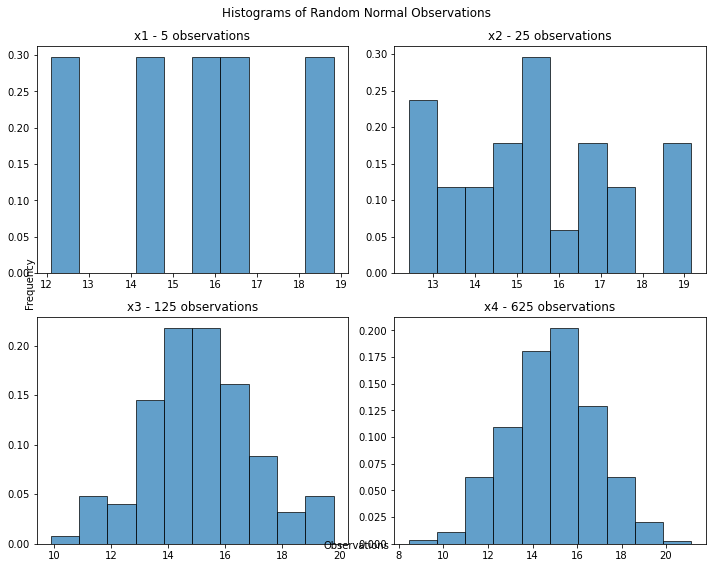

In [17]:
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

axes[0, 0].hist(x1, bins=10, density = True, edgecolor = 'black', alpha = 0.7)
axes[0, 0].set_title('x1 - 5 observations')
axes[0, 1].hist(x2, bins=10, density = True, edgecolor = 'black', alpha = 0.7)
axes[0, 1].set_title('x2 - 25 observations')
axes[1, 0].hist(x3, bins=10, density = True, edgecolor = 'black', alpha = 0.7)
axes[1, 0].set_title('x3 - 125 observations')
axes[1, 1].hist(x4, bins=10, density = True, edgecolor = 'black', alpha = 0.7)
axes[1, 1].set_title('x4 - 625 observations')

fig.text(0.5, 0.04, 'Observations', ha = 'center')
fig.text(0.04, 0.5, 'Frequency', va = 'center', rotation = 'vertical')
fig.suptitle('Histograms of Random Normal Observations')

plt.tight_layout()

plt.show()

**3. Compute the sample means, standard deviations, and standard errors of x1, x2, x3, & x4.**

In [18]:
sample_means = [np.mean(x1), np.mean(x2), np.mean(x3), np.mean(x4)]
sample_std_devs = [np.std(x1), np.std(x2), np.std(x3), np.std(x4)]
sample_standard_errors = [np.std(x1) / np.sqrt(len(x1)),
                          np.std(x2) / np.sqrt(len(x2)),
                          np.std(x3) / np.sqrt(len(x3)),
                          np.std(x4) / np.sqrt(len(x4))]

print("Sample Means:", sample_means)
print("Sample Standard Deviations:", sample_std_devs)
print("Sample Standard Errors:", sample_standard_errors)

Sample Means: [15.514244794423075, 15.38155905795485, 15.127359290503641, 14.887092033617716]
Sample Standard Deviations: [2.213637204881067, 1.95710553305101, 1.9202675367485016, 1.951516967777483]
Sample Standard Errors: [0.989968653527339, 0.391421106610202, 0.171753949886229, 0.07806067871109933]


**4. Compare these to each other and the parameters of the distribution they come from. How do
they differ?**

The sample means should be close to the true mean of 15, and the sample standard deviations should be close to the true standard deviation of 2, as we generated observations from a normal distribution with these parameters. The sample standard errors give an estimate of the uncertainty in the sample mean.

# Section 6: Poisson Distribution

**1. Using numpy & seed(100), generate a Poisson distribution setting lam=12 and size=1200.**

In [19]:
np.random.seed(100)
poisson_values = np.random.poisson(lam = 12, size = 1200)

**2. Compute mean and variance of your 1200 random Poisson values.**

In [20]:
mean = np.mean(poisson_values)
variance = np.var(poisson_values)

print(mean)
print(variance)

11.798333333333334
11.847663888888889


**3. Does the lambda = mean = variance?**

In [21]:
lambda_value = 12

lambda_equal_mean = lambda_value == mean
lambda_equal_variance = lambda_value == variance

print("Lambda = Mean:", lambda_equal_mean)
print("Lambda = Variance:", lambda_equal_variance)

Lambda = Mean: False
Lambda = Variance: False


**4. Repeat 1-3 using size = 4. Does lambda=mean=variance?**

In [22]:
poisson_values = np.random.poisson(lam = 12, size = 4)

mean = np.mean(poisson_values)
variance = np.var(poisson_values)
print(mean)
print(variance)

lambda_value = 12

lambda_equal_mean = lambda_value == mean
lambda_equal_variance = lambda_value == variance

print("Lambda = Mean:", lambda_equal_mean)
print("Lambda = Variance:", lambda_equal_variance)

12.75
5.6875
Lambda = Mean: False
Lambda = Variance: False


# Section 7: Analysis

Its late 2005, and your boss at the DVD rental company wants to know how effective his customer promotion program was. He tells you, *‘I want you to give me some descriptive information about how much the customers spent before and after the program started. Were the spending habits similar? Did they differ? Did the program help or make things worse?’*

**1. What is the outcome?**

The outcome of the analysis is to provide descriptive information about the customers' spending habits before and after the customer promotion program. The goal is to determine if the program had any impact on the customers' spending behavior.

**2. What is the main effect/predictor he wants to understand the impact of?**

The main effect/predictor that the boss wants to understand the impact of is the customer promotion program. The analysis aims to determine if the program influenced the amount of money customers spent.

**3. What is the hypothesis?**

Lucky for you, your boss already asked Ted in Bethesda to give you a query for how to get the information.

Query:
    
    with b4 as (
        select p.customer_id, sum(p.amount) as Payment_before
        from rental r
        left outer join payment p on p.rental_id = r.rental_id
        where rental_date < cast('2005-07-01' as timestamp)
        and amount is not null
        group by p.customer_id),
    aft as (
        select p.customer_id, sum(p.amount) as Payment_after
        from rental r
        left outer join payment p on p.rental_id = r.rental_id
        where rental_date >= cast('2005-07-01' as timestamp)
        and amount is not null
        group by p.customer_id
    )
    select distinct c.customer_id, store_id, first_name, last_name, active, payment_before, payment_after
    from customer c
    left outer join b4 r on r.customer_id = c.customer_id
    left outer join aft a on a.customer_id = c.customer_id
    where payment_after is not null and payment_before is not null

Plus, the statistician you work with has some suggestions for how to give your boss what he wants. Query the data from your container and put it in a Pandas dataframe. Then follow the statistician’s suggestions.

In [23]:
query = '''
    with b4 as (
        select p.customer_id, sum(p.amount) as Payment_before
        from rental r
        left outer join payment p on p.rental_id = r.rental_id
        where rental_date < cast('2005-07-01' as timestamp)
        and amount is not null
        group by p.customer_id),
    aft as (
        select p.customer_id, sum(p.amount) as Payment_after
        from rental r
        left outer join payment p on p.rental_id = r.rental_id
        where rental_date >= cast('2005-07-01' as timestamp)
        and amount is not null
        group by p.customer_id
    )
    select distinct c.customer_id, store_id, first_name, last_name, active, payment_before, payment_after
    from customer c
    left outer join b4 r on r.customer_id = c.customer_id
    left outer join aft a on a.customer_id = c.customer_id
    where payment_after is not null and payment_before is not null
'''

df = pd.read_sql_query(query, conn)

**4. Compute summary statistics and create histograms of the payment_before and payment_after variables. (Try using describe( ) in pandas).**

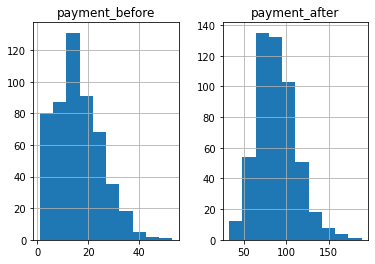

In [24]:
# Assuming you have fetched the data into a pandas DataFrame called 'data'
summary_stats = df[['payment_before', 'payment_after']].describe()
histograms = df[['payment_before', 'payment_after']].hist(bins = 10)

**5. Compute the correlation between these two variables and create a scatterplot.**


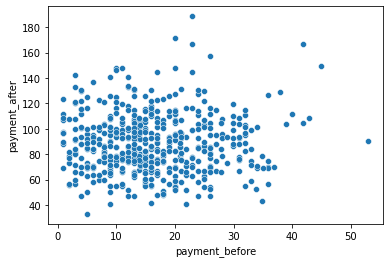

In [25]:
correlation = df[['payment_before', 'payment_after']].corr()
sns.scatterplot(x = 'payment_before', y = 'payment_after', data = df)
plt.show()

**6. Compute a variable which is the difference between the amounts spent before and after the
program started: payment_after – payment_before.**

In [26]:
df['difference'] = df['payment_after'] - df['payment_before']

print(df['difference'])

0       95.77
1       67.84
2       94.79
3       60.82
4       44.87
        ...  
513     95.76
514    110.79
515     65.84
516     41.89
517     66.85
Name: difference, Length: 518, dtype: float64


**7. Generate a histogram of the difference and conduct a one-sample t-test.**

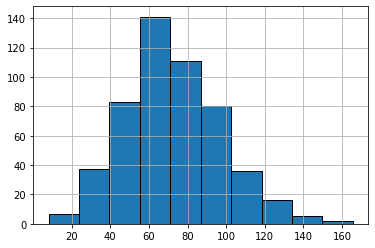

66.50556288293606 1.506644649500588e-255


In [27]:
df['difference'].hist(bins = 10, edgecolor = 'black')
plt.show()

t_statistic, p_value = stats.ttest_1samp(df['difference'], 0)

print(t_statistic, p_value)

**8. Interpret your results.**

The t_statistic represents the calculated t-value, and the p_value represents the probability of observing the given t-value under the null hypothesis (no difference in payment amounts). As the p-value is far more lower than the chosen significance level, it suggests that there is a significant difference in payment amounts before and after the program.

In [28]:
conn.close()